# **Breast Cancer Prediction**

# LIBRARIES


In [1]:
import numpy as pd
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix


# **Load the Data**

In [4]:
BC =pd.read_csv("/content/cancer.csv",header=0)
BC.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **Clean and prepare Data**

In [5]:
BC.drop('id',axis=1,inplace=True)
BC.drop('Unnamed: 32',axis=1,inplace=True)
len(BC)


569

In [7]:
BC.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [8]:
BC['diagnosis']=BC['diagnosis'].map({'M':1,'B':0})
BC.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Explore Data**

In [9]:
BC.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
print(BC.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [9]:
BC.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
BC['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


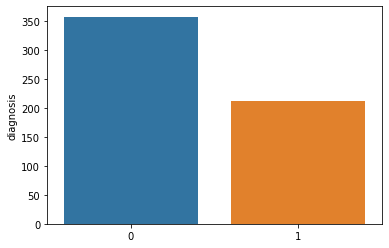

In [11]:
sns.barplot(BC['diagnosis'].value_counts().index,BC['diagnosis'].value_counts())

<function matplotlib.pyplot.show(*args, **kw)>

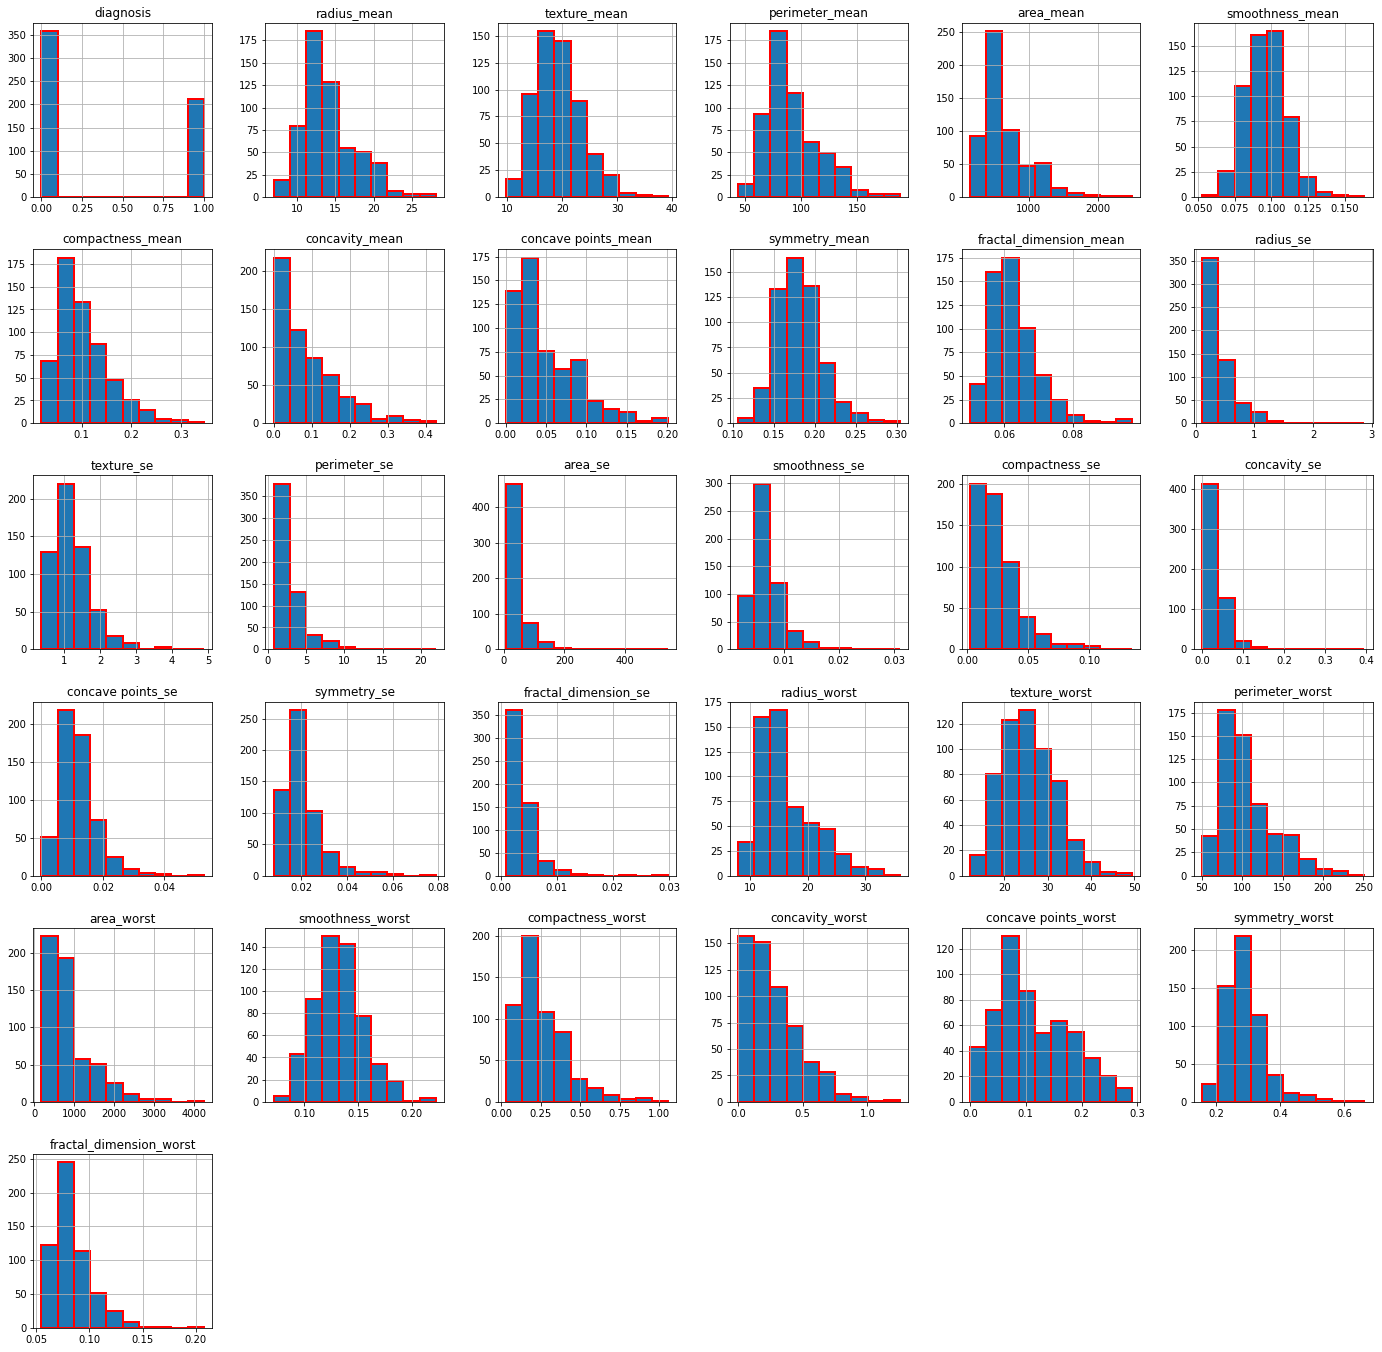

In [12]:
BC.hist(edgecolor='red',linewidth= 2)
fig = plt.gcf()
fig.set_size_inches(24,24)
plt.show

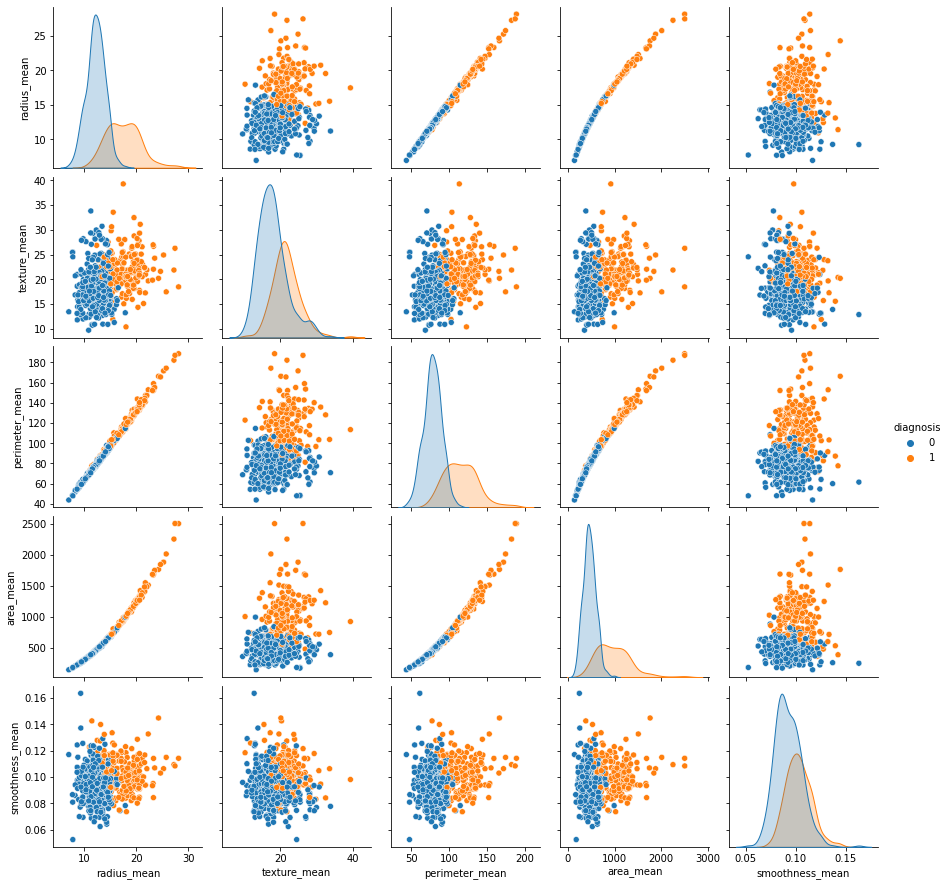

In [13]:
sns.pairplot(BC.iloc[:,0:6],hue='diagnosis')

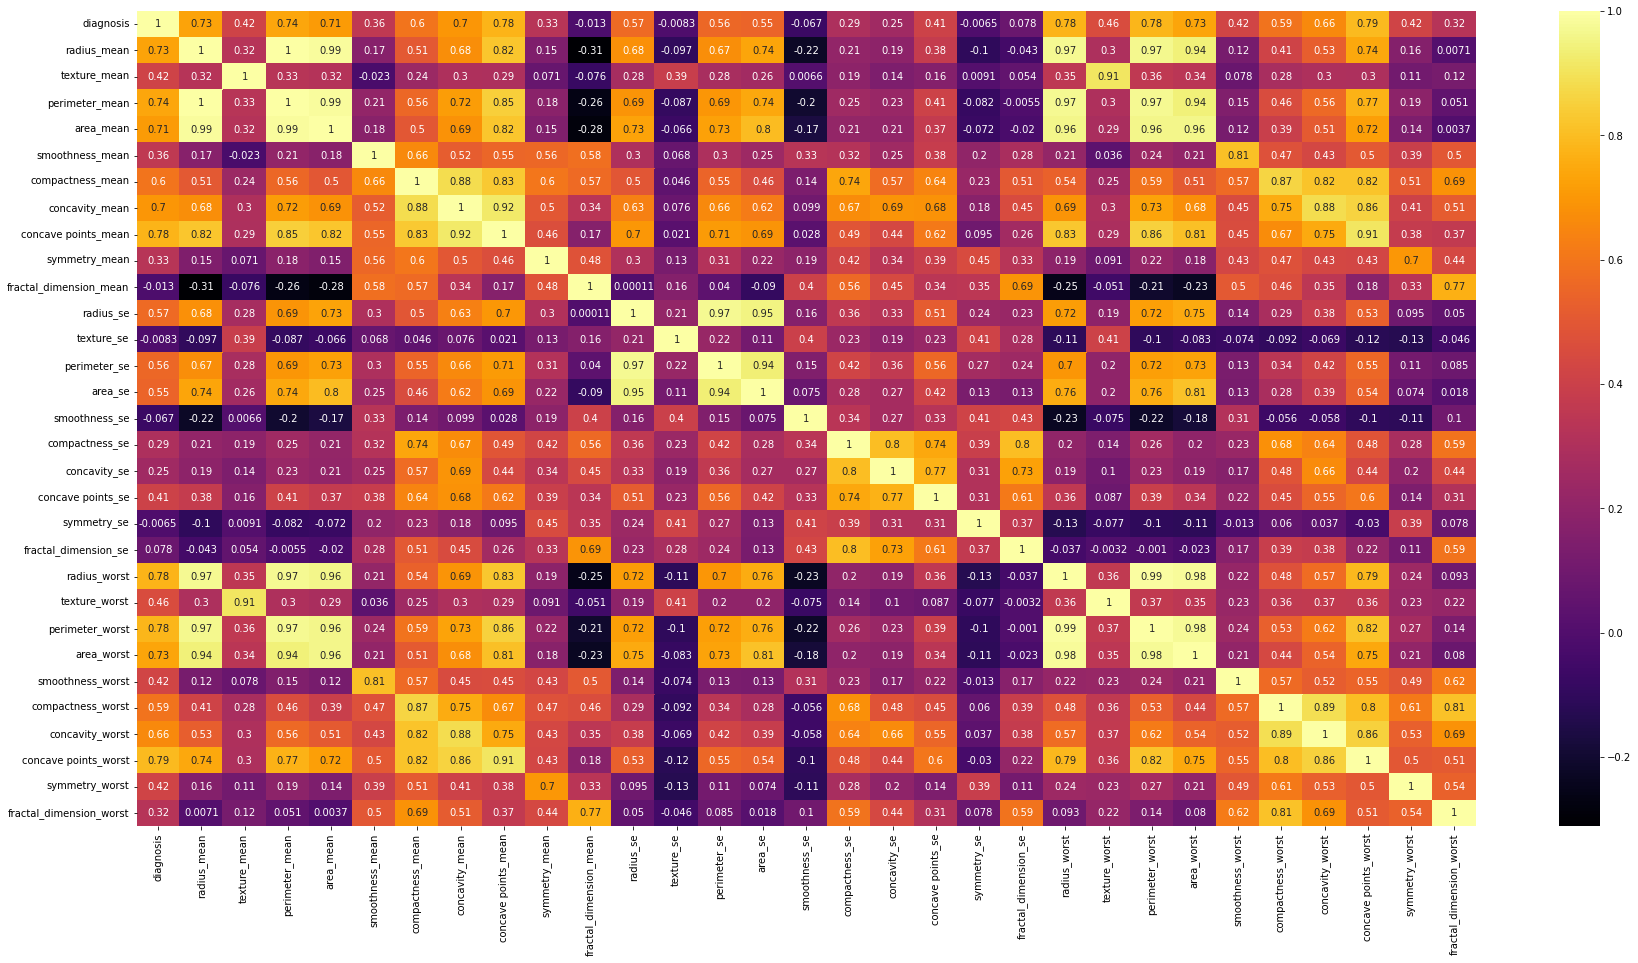

In [19]:
plt.figure(figsize=(30,15))
sns.heatmap(BC.corr(),annot=True,cmap='inferno')
plt.show()

In [15]:
BC.shape

(569, 31)

In [16]:
train,test=train_test_split(BC,test_size=0.3)
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [22]:
train_x=train[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']]
train_y=train.diagnosis

test_x=test[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']]
test_y=test.diagnosis

In [25]:
train_x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
199,14.45,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,...,18.33,30.12,117.90,1044.0,0.15520,0.4056,0.49670,0.18380,0.4753,0.10130
305,11.60,24.49,74.23,417.2,0.07474,0.05688,0.01974,0.01313,0.1935,0.05878,...,12.44,31.62,81.39,476.5,0.09545,0.1361,0.07239,0.04815,0.3244,0.06745
300,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,0.06552,...,25.93,26.24,171.10,2053.0,0.14950,0.4116,0.61210,0.19800,0.2968,0.09929
14,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,0.07682,...,15.03,32.01,108.80,697.7,0.16510,0.7725,0.69430,0.22080,0.3596,0.14310
392,15.49,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.09113,0.1929,0.06744,...,21.20,29.41,142.10,1359.0,0.16810,0.3913,0.55530,0.21210,0.3187,0.10190


In [27]:
test_x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
376,10.570,20.22,70.15,338.3,0.09073,0.16600,0.22800,0.05941,0.2188,0.08450,...,10.85,22.82,76.51,351.9,0.1143,0.3619,0.60300,0.14650,0.2597,0.12000
158,12.060,12.74,76.84,448.6,0.09311,0.05241,0.01972,0.01963,0.1590,0.05907,...,13.14,18.41,84.08,532.8,0.1275,0.1232,0.08636,0.07025,0.2514,0.07898
273,9.742,15.67,61.50,289.9,0.09037,0.04689,0.01103,0.01407,0.2081,0.06312,...,10.75,20.88,68.09,355.2,0.1467,0.0937,0.04043,0.05159,0.2841,0.08175
148,14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,...,15.85,19.85,108.60,766.9,0.1316,0.2735,0.31030,0.15990,0.2691,0.07683
460,17.080,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.06431,0.1793,0.06281,...,22.96,34.49,152.10,1648.0,0.1600,0.2444,0.26390,0.15550,0.3010,0.09060


In [28]:
train_x.shape

(398, 30)

In [29]:
Model=svm.SVC()
Model.fit(train_x,train_y)
prediction=Model.predict(test_x)
print('The Accuracy of SVM is: ',metrics.accuracy_score(prediction, test_y))

The Accuracy of SVM is:  0.8947368421052632


In [32]:
print(classification_report(test_y,prediction))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       102
           1       0.96      0.77      0.85        69

    accuracy                           0.89       171
   macro avg       0.91      0.87      0.89       171
weighted avg       0.90      0.89      0.89       171



In [33]:
train_x_min=train_x.min()
train_x_min

radius_mean                  6.981000
texture_mean                 9.710000
perimeter_mean              43.790000
area_mean                  143.500000
smoothness_mean              0.052630
compactness_mean             0.019380
concavity_mean               0.000000
concave points_mean          0.000000
symmetry_mean                0.106000
fractal_dimension_mean       0.049960
radius_se                    0.114400
texture_se                   0.360200
perimeter_se                 0.757000
area_se                      6.802000
smoothness_se                0.002826
compactness_se               0.002252
concavity_se                 0.000000
concave points_se            0.000000
symmetry_se                  0.007882
fractal_dimension_se         0.000950
radius_worst                 7.930000
texture_worst               12.020000
perimeter_worst             50.410000
area_worst                 185.200000
smoothness_worst             0.081250
compactness_worst            0.034320
concavity_wo

In [34]:
train_x_max=train_x.max()
train_x_max

radius_mean                  27.22000
texture_mean                 39.28000
perimeter_mean              182.10000
area_mean                  2250.00000
smoothness_mean               0.16340
compactness_mean              0.34540
concavity_mean                0.42680
concave points_mean           0.20120
symmetry_mean                 0.30400
fractal_dimension_mean        0.09575
radius_se                     1.50900
texture_se                    3.89600
perimeter_se                 10.12000
area_se                     233.00000
smoothness_se                 0.03113
compactness_se                0.13540
concavity_se                  0.39600
concave points_se             0.05279
symmetry_se                   0.07895
fractal_dimension_se          0.02984
radius_worst                 33.12000
texture_worst                49.54000
perimeter_worst             220.80000
area_worst                 3432.00000
smoothness_worst              0.21840
compactness_worst             1.05800
concavity_wo